# Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


# Exploração dos dados

In [4]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

# Exibição dos dados

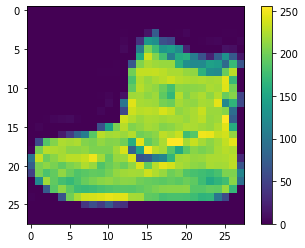

In [6]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta','Calça','Pullover','Vestido','Casaco','Sandália','Camisa',
                           'Tênis','Bolsa','Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

# Normalizando as imagens

In [7]:
imagens_treino = imagens_treino/float(255)

# Criando, compilando, treinando e normalizando o modelo

In [8]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

adam = keras.optimizers.Adam(lr=0.002)

'''lr
learning rate
taxa de aprendizado'''

parando_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                               monitor='val_loss', save_best_only=True)]

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, 
                       batch_size = 480,
                       epochs=5, validation_split=0.2,
                       callbacks=parando_cedo)

Epoch 1/5
100/100 [==============================] - 2s 19ms/step - loss: 0.8986 - accuracy: 0.6839 - val_loss: 0.4615 - val_accuracy: 0.8403
Epoch 2/5
100/100 [==============================] - 1s 14ms/step - loss: 0.4533 - accuracy: 0.8456 - val_loss: 0.4090 - val_accuracy: 0.8564
Epoch 3/5
100/100 [==============================] - 1s 13ms/step - loss: 0.3916 - accuracy: 0.8594 - val_loss: 0.3761 - val_accuracy: 0.8646
Epoch 4/5
100/100 [==============================] - 1s 14ms/step - loss: 0.3653 - accuracy: 0.8683 - val_loss: 0.3602 - val_accuracy: 0.8702
Epoch 5/5
100/100 [==============================] - 1s 13ms/step - loss: 0.3337 - accuracy: 0.8794 - val_loss: 0.3537 - val_accuracy: 0.8697


# Sumário do modelo

In [9]:
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# Pesos da primeira camada Dense

In [10]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[-0.05162121,  0.10540802, -0.07134499, ...,  0.03295968,
         0.03026406,  0.01364537],
       [-0.04363212,  0.01336985, -0.11592626, ...,  0.06362367,
         0.11526574, -0.02556864],
       [ 0.01071929,  0.02443606, -0.09620269, ...,  0.03492364,
        -0.00520961, -0.07847197],
       ...,
       [-0.06054724, -0.02653551, -0.09442265, ..., -0.03097174,
        -0.00794061, -0.04479073],
       [ 0.04248815, -0.02373613, -0.00690734, ...,  0.01389231,
         0.14078224, -0.0167194 ],
       [ 0.01820043,  0.1211691 , -0.13744141, ..., -0.0100893 ,
         0.06001334, -0.0416038 ]], dtype=float32)

In [11]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)
'''

modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)

modelo.layers[1].get_weights()

NameError: ignored

In [12]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3698 - accuracy: 0.8626 - val_loss: 0.3744 - val_accuracy: 0.8594
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3526 - accuracy: 0.8692 - val_loss: 0.3344 - val_accuracy: 0.8736
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3225 - accuracy: 0.8797 - val_loss: 0.3339 - val_accuracy: 0.8806
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3154 - accuracy: 0.8832 - val_loss: 0.3291 - val_accuracy: 0.8820
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3006 - accuracy: 0.8863 - val_loss: 0.3370 - val_accuracy: 0.8812


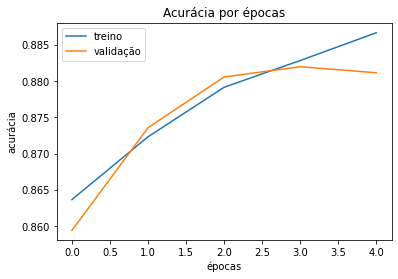

In [14]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

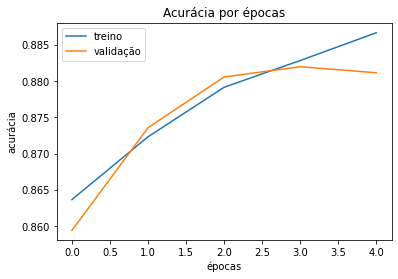

In [15]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

In [16]:
modelo.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None

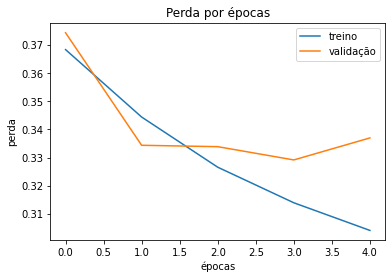

In [17]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [18]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [19]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

# Salvando e carregando o modelo treinado

In [20]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

# Visualizando as acurácias de treino e validação por época

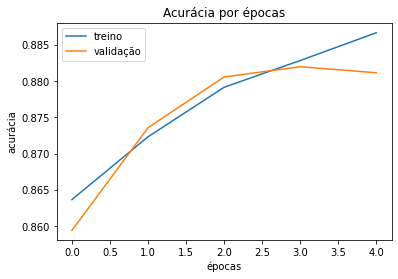

In [22]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

# Visualizando as perdas de treino e validação por época

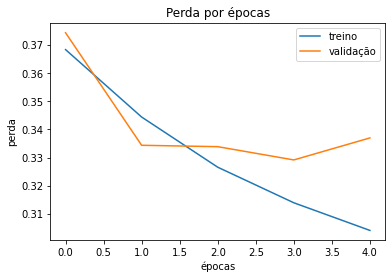

In [23]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

# Testando o modelo e o modelo salvo

In [24]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 5
número da imagem de teste: 2
resultado teste modelo salvo: 5
número da imagem de teste: 2


# Avaliando o modelo

In [25]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 225490.9219 - accuracy: 0.1000
Perda do teste: 225490.921875
Acurácia do teste: 0.10000000149011612
